## Importing the required libraries

In [1]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
%matplotlib inline

## Checking and preparing the data

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df_des = df.drop(['customer_id','gender','country','credit_card','active_member'], axis='columns')
df_des.mean()

credit_score           650.528800
age                     38.921800
tenure                   5.012800
balance              76485.889288
products_number          1.530200
estimated_salary    100090.239881
churn                    0.203700
dtype: float64

In [5]:
df.isnull().any()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

#### Fortunately, the dataset looks clean and has no null values.

#### We need to know how many customers the bank has and how many nationalities are there among the customers

In [6]:
df[['customer_id','country']].nunique()

customer_id    10000
country            3
dtype: int64

#### We have 1000 customers with three different nationalities.

## Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler

columns_list = ['balance', 'estimated_salary']  
scaler = MinMaxScaler()
df[columns_list] = scaler.fit_transform(df[columns_list])
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.000000,1,1,1,0.506735,1
1,15647311,608,Spain,Female,41,1,0.334031,1,0,1,0.562709,0
2,15619304,502,France,Female,42,8,0.636357,3,1,0,0.569654,1
3,15701354,699,France,Female,39,1,0.000000,2,0,0,0.469120,0
4,15737888,850,Spain,Female,43,2,0.500246,1,1,1,0.395400,0


## Visualizing and understanding some aspects of attributes.

<Axes: xlabel='gender'>

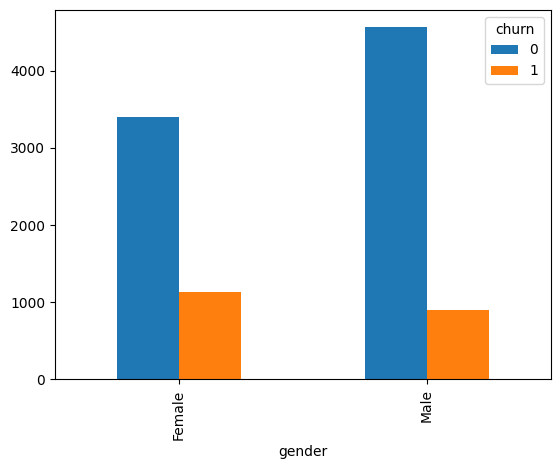

In [8]:
pd.crosstab(df.gender, df.churn).plot(kind = 'bar')

#### The ratio of women to men is slightly higher in discontinuing the use of bank services.

<Axes: xlabel='country'>

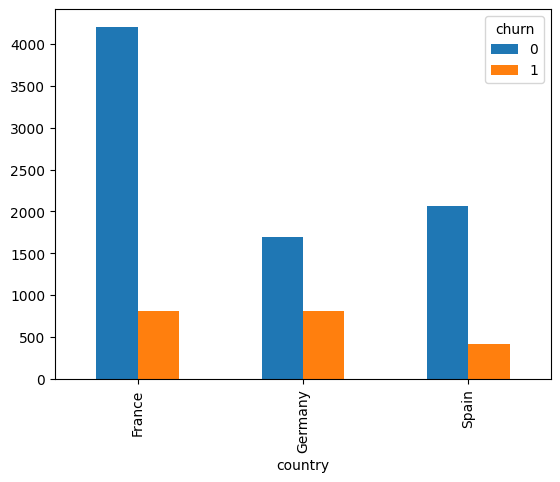

In [9]:

pd.crosstab(df.country, df.churn).plot(kind = 'bar')


#### French customers seem to be most loyal customers. And the highest rate of withdrawal from banking services belong to Germans.

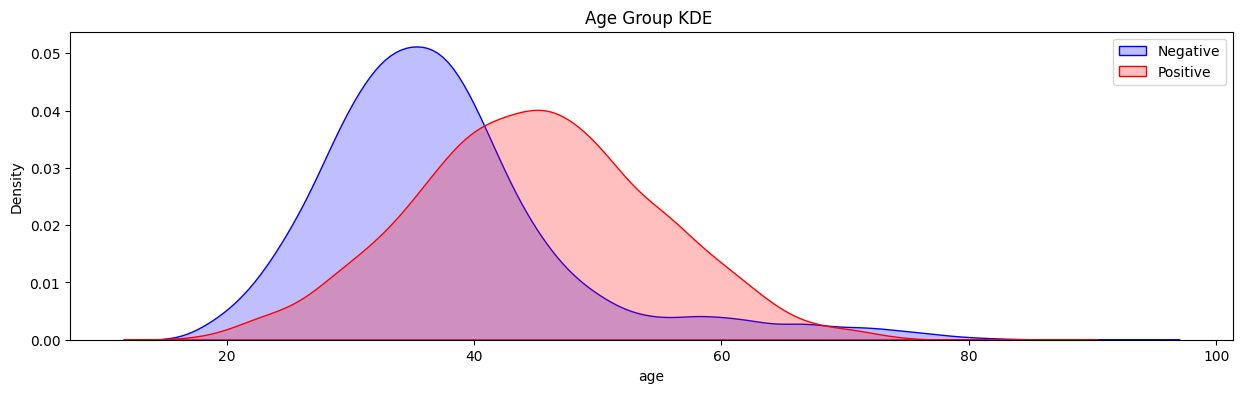

In [24]:
fig = plt.figure(figsize = (15, 4),)
ax = sns.kdeplot(df.loc[(df['churn'] == 0), 'age'], color = 'b', fill =True, label = 'Negative')
ax = sns.kdeplot(df.loc[(df['churn'] == 1), 'age'], color = 'r', fill =True, label = 'Positive' )
plt.title('Age Group KDE ')
plt.legend()
plt.show()

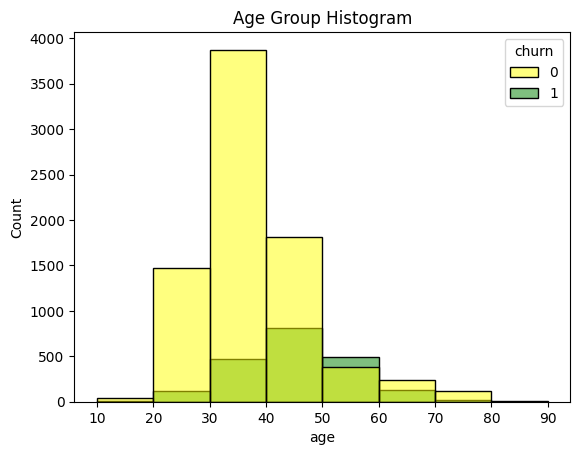

In [23]:
sns.histplot(data = df, x='age', hue='churn', palette=['yellow', 'green'], bins=[10,20,30,40,50,60,70,80,90]).set_title(f"Age Group Histogram")

plt.show()

##### Both by the kernel density estimate and the histogram, it can be concluded that customers in the middle age group (50 to 60) are more inclined not to use the bank services after a period. Contrastingly, young customers are less likely to close their bank accounts. 

#### Since the categorical data cannot be fed up to M.L algorithms, we need to convert the gender and country data into numerical. 

In [12]:
categorical_cols = ['country','gender']
df = pd.get_dummies(data= df, columns = categorical_cols, dtype= int)

df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,15647311,608,41,1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,15619304,502,42,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,15701354,699,39,1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,15737888,850,43,2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859


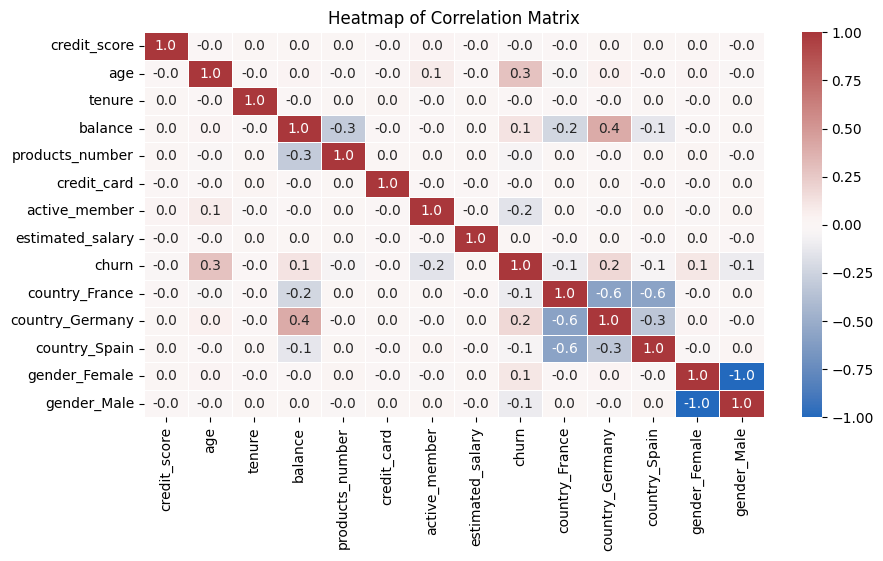

In [13]:
dfcor = df.drop(['customer_id'], axis= 'columns')
corr = dfcor.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap = 'vlag', annot = True,vmin=-1, vmax=1,fmt=".1f",linewidth=.5,)
plt.title('Heatmap of Correlation Matrix')
corr.head()

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

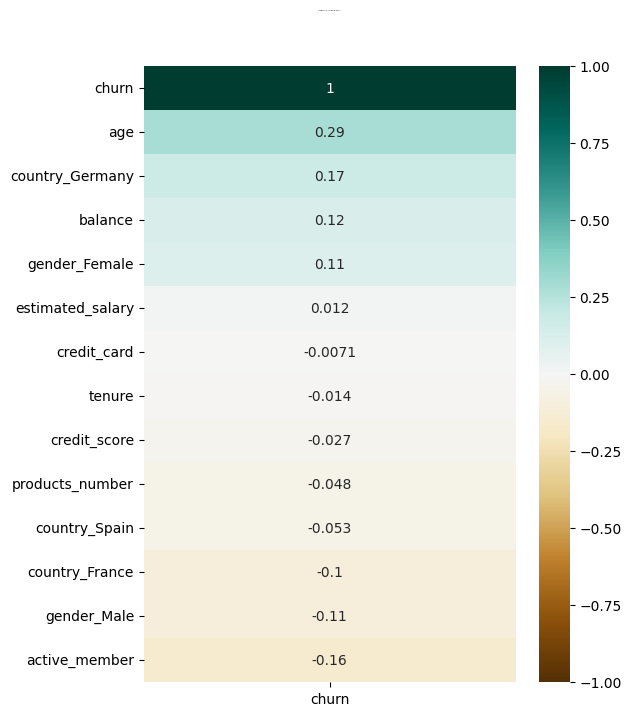

In [14]:
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(corr[['churn']].sort_values(by='churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap of Correlation Matrix',fontdict={'fontsize':1}, pad=40)

##### ● Both heatmaps illustrate that age, German nationality, balance, and female gender have the strongest positive correlation with and influence on churn.
##### ● In contrast, Spanich and French nationality, having a male gender and being active member exhibit the strongest negative correlation.
##### ● Notably, amount of salary, owning credit card, tenure and credit score show negligible correlation with churn.

## Making the dataset ready for model training

In [15]:
dftrainx = df.drop(['customer_id','churn'], axis = 'columns')
dftrainx.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.000000,1,1,1,0.506735,1,0,0,1,0
1,608,41,1,0.334031,1,0,1,0.562709,0,0,1,1,0
2,502,42,8,0.636357,3,1,0,0.569654,1,0,0,1,0
3,699,39,1,0.000000,2,0,0,0.469120,1,0,0,1,0
4,850,43,2,0.500246,1,1,1,0.395400,0,0,1,1,0


In [16]:
dftrainy= pd.DataFrame()
dftrainy['churn'] = df.churn
dftrainy.head()

,churn
0,1
1,0
2,1
3,0
4,0


## Hyperparameter Tuning

In [17]:
model_params = {


            'logistic_regression' : {
            'model': LogisticRegression(max_iter= 9000),
            'params': {
            'solver': ["sag", "saga","liblinear","lbfgs","newton-cholesky"],
            'C': [10]

        }
    },

            'random_forest': {
            'model': RandomForestClassifier(),
            'params' : {
            'n_estimators': [1,5,10],
            'bootstrap': [True, False],
            'max_depth': [10, 50, 100, None],   #2070
            'max_features': ['sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
        }
    },
            'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params' : {
            'criterion': ["gini", "entropy"],
            'max_depth': [30, 50, 60, None],   #10100
            'max_features': ['sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2,4, 5, 10],
        }
    },
        'nb_Multinomial': {
        'model': MultinomialNB(),
        'params' : {
            'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]
        }
    },
        'nb_Gaussian': {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-2, 1e-5, 1e-10]
        }
    },
         'svm': {
         'model': svm.SVC(),
         'params' : {
         'gamma': [ 0.01, 0.001],
         'C': [1,2 ],
         'kernel': [ "rbf", "sigmoid"]  
        }   
    }
 
}

In [18]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    clf.fit(dftrainx, np.ravel(dftrainy))
    scores.append({
        'model': model_name,       
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
pd.set_option("max_colwidth", None)
dfresult = pd.DataFrame(scores,columns=['model','best_score','best_params']               
                 )
dfresult


,model,best_score,best_params
0,logistic_regression,0.8110,"{'C': 10, 'solver': 'sag'}"
1,random_forest,0.8605,"{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}"
2,decision_tree,0.8269,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}"
3,nb_Multinomial,0.7744,{'alpha': 0.01}
4,nb_Gaussian,0.8199,{'var_smoothing': 1e-05}
5,svm,0.8067,"{'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}"


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


dftrainx_train, dftrainx_test, dftrainy_train, dftrainy_test = train_test_split(dftrainx, dftrainy, test_size=0.2, random_state=42)


model = RandomForestClassifier(bootstrap = True, max_depth = 10,  max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 10)


model.fit(dftrainx_train, np.ravel(dftrainy_train))


scores = cross_val_score(model, dftrainx_train, np.ravel(dftrainy_train), cv=2)

print("Cross-validation scores:", scores)


Cross-validation scores: [0.85475 0.85275]


In [20]:
predictions = model.predict(dftrainx_test)

## Classification Report

In [21]:
report = classification_report(np.ravel(dftrainy_test), predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



#### One thing to note here is that the recall and F1 score for churn =1  are roughly half of those for  churn = 0. This could have happened due to unbalanced classes. Undersampling or oversampling techniques may improve the scores.